In [ ]:
"""
Plan of attack:
- move the graph stuff from Delayed to graph module
- Build support for each Delayed object constructing it's own graph.
- Make sure it all works. 

- Then consider a master graph and how that would work. 
- Edge cases to consider: updates to dependencies in the name space
- Does the whole graph need to updated every time for safety? 
- Yada yada
"""

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from delayed import delayed
import networkx as nx

18
0.18710041046142578
18
0.18589448928833008


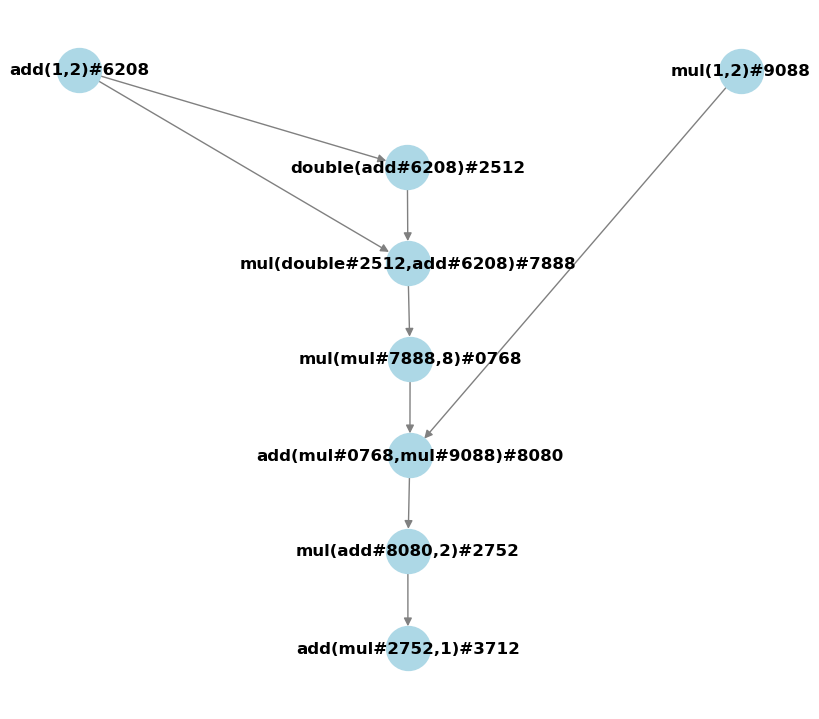

In [15]:
from time import time, sleep

sleep_time = 0.05

@delayed(cache_data=False)
def add(a, b):
    sleep(sleep_time)
    return a + b

@delayed
def mul(a, b):
    sleep(sleep_time)
    return a * b

def double(a):
    return a*2

a = add(1, 2)
b = delayed(double)(a)
c = mul(b, a)

d = mul(c, 8)
e = mul(1, 2)
f = add(d, e)
g = mul(f, 2)
h = add(g, 1)

h.visualize(jitter=0.001)

t = time()
print(c.compute())
print(time() - t)

t = time()
print(c.compute())
print(time() - t)

In [85]:
a.update_args(3, 5)

t = time()
print(c.compute())
print(time() - t)

40
0.17908692359924316


In [2]:
from delayed.types import DelayedData

dd = DelayedData()
dd.set(np.random.randn(100, 10))
print(dd)

DelayedData(computed=True, datatype=<class 'numpy.ndarray'>)
